# Resampling Methods

The goal of predictive modeling is to create models that make good predictions on new data. We
don't have access to this new data at the time of training, so we must use statistical methods to estimate the performance of a model on new data. This class of methods are called resampling methods, as they resampling your available training data.

------

# Theory

## Exercise 1

We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is $(1 − 1/n) ^ n$.

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample

(f)When n = 10,000, what is the probability that the jth observation
is in the bootstrap sample?


a) (n-1)/n 

bootstrap sampling is random, so there is only a 1/n chance of the observation being any paticular sample.

b) (n-1)/n

bootstrapping uses replacement, so the chance is the same with the second observation.

c) If the chance that the jth observation is not in the bootstrap sample is (1 - 1/n), it will be (1-1/n)^n when sampled n times

In [2]:
print(f"d) {1-(1-1/5)**5}")

d) 0.6723199999999999


In [3]:
print(f"e) {1-(1-1/100)**100}")

e) 0.6339676587267709


In [5]:
print(f"f) {1-(1-1/100000)**100000}")

f) 0.6321223982317534


## Exercise 2

We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

(b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:
    
    i. The validation set approach?
    
    ii. LOOCV?

a) Randomly sampling a subset of the data for testing purposes and using the rest for training, then soing this n times until the whole dataset has been used for testing the model. Then averaging those results to produce a model of the dataset as a whole.

bi) advantage: nullifies the risk of the training split not being representative of the dataset as a whole (lowers error)

bii) advantage: very low bias due to using almost the entirely dataset for training

disadvantage: as the training sets are all nearly identical, they are naturally highly correlated with each other. Also, since the training set is all the data - 1 sample, the computational requirements are high

## Exercise 3

Suppose that we use some statistical learning method to make a prediction
for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

# Practical

## Exercise - Credit Card Default Data Set

We previously used logistic regression to predict the probability of `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach.

**Task** - Fit a logistic regression model that uses `income` and `balance` to predict `default`. Compare the error of the scikit-learn and statsmodel implementations without the validation set.

In [162]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

In [58]:
default = pd.read_csv("default.csv")
default.head()

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879


I am confused here as to why you would only use the default == yes dataset for fitting purposes

In [10]:
# statsmodels
results = smf.logit('default ~ balance + income', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Jul 2017   Pseudo R-squ.:                  0.4594
Time:                        15:29:52   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
# sklearn
X = default[['balance', 'income']]
y = default.default
lr = LogisticRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([ -1.94164125e-06]), array([[ 0.00040756, -0.00012588]]))

In [28]:
(lr.predict(X) == y).mean()

0.96640000000000004

In [23]:
((results.predict(X) > 0.5) == y).mean()

0.97370000000000001

**Task** - Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

1. Split the sample set into a training set and a validation set.
2. Fit a multiple logistic regression model using only the training observations.
3. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the `default` category if the posterior probability is greater than 0.5.
4. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
5. Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.
6. Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.

In [32]:
default.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = lr = LogisticRegression(C=100000, tol=0.0000001)
lr.fit(X_train, y_train)
print(f"Prediction Accuracy: {round(((lr.predict(X_test) == y_test).mean()) * 100, 2)}%")

Prediction Accuracy: 97.12%


In [41]:
print(f"Error rate: {round((1 - (lr.predict(X_test) == y_test).mean()) * 100, 2)}%")

Error rate: 2.88%


In [63]:
for i in range(1,4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    lr = lr = LogisticRegression(C=100000, tol=0.0000001)
    lr.fit(X_train, y_train)
    print(f"Prediction Accuracy: {round(((lr.predict(X_test) == y_test).mean()) * 100, 2)}%")
    print(f"Error rate: {round((1 - (lr.predict(X_test) == y_test).mean()) * 100, 2)}%")

Prediction Accuracy: 97.48%
Error rate: 2.52%
Prediction Accuracy: 97.44%
Error rate: 2.56%
Prediction Accuracy: 97.88%
Error rate: 2.12%


Pretty similar results for different testing/training splits

In [59]:
default['student'] = np.where(default['student'] == "Yes", 1, 0)

In [61]:
X = default[['balance', 'income', 'student']]
y = default.default
for i in range(1,4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    lr = lr = LogisticRegression(C=100000, tol=0.0000001)
    lr.fit(X_train, y_train)
    print(f"Prediction Accuracy: {round(((lr.predict(X_test) == y_test).mean()) * 100, 2)}%")
    print(f"Error rate: {round((1 - (lr.predict(X_test) == y_test).mean()) * 100, 2)}%")

Prediction Accuracy: 97.44%
Error rate: 2.56%
Prediction Accuracy: 97.52%
Error rate: 2.48%
Prediction Accuracy: 97.84%
Error rate: 2.16%


Pretty much the same results

**Task** - Compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients by using the bootrap and logistic regression functions.

1. Use the summary() method on the logistic regression statsmodel instance.
2. Implement your own bootstrap method and run the model 100 times
3. Comment on the estimated standard errors obtained using statsmodels and your bootstrap.

In [64]:
results = smf.logit('default ~ income + balance', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Jul 2017   Pseudo R-squ.:                  0.4594
Time:                        16:23:23   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [65]:
results.params, results.bse

(Intercept   -11.540468
 income        0.000021
 balance       0.005647
 dtype: float64, Intercept    0.434772
 income       0.000005
 balance      0.000227
 dtype: float64)

In [66]:
df_params = pd.DataFrame(columns=['Intercept', 'income', 'balance'])

for i in range(100):
    sample = default.sample(len(default), replace=True)
    row = smf.logit('default ~ income + balance', data=sample).fit(disp=False)
    df_params = df_params.append(row.params, ignore_index=True)

In [67]:
df_params.mean(), df_params.std()

(Intercept   -11.575390
 income        0.000021
 balance       0.005665
 dtype: float64, Intercept    0.425461
 income       0.000004
 balance      0.000231
 dtype: float64)

Very similar results

### Exercise 5 -  Stock Market Data

**Task** - We will compute the LOOCV error for a simple logistic regression model on the `SMarket` data set.  

1. Read in the stock market data set
2. Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.
3. Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` using all but the first observation.
4. Use the model from (3) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(\mbox{direction = Up} | Lag1,Lag2 ) > 0.5$. Was this observation correctly classified?
5. Write a loop from `i=1` to `i=n`, where n is the number of observations in the data set, that performs each of the following steps:
    - Fit a logistic regression model using all but the ith observation to predict `Direction` using `Lag1` and `Lag2`.
    - Compute the posterior probability of the market moving up for the ith observation.
    - Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
    - Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.
6. Take the average of the n numbers obtained in (5) in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [76]:
stocks = pd.read_csv('Smarket.csv', usecols=range(1,10))
stocks.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [77]:
stocks['Direction'] = np.where(stocks['Direction'] == 'Up', 1, 0)

In [95]:
results = smf.logit('Direction ~ Lag1 + Lag2', data=stocks).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691361
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Jul 2017   Pseudo R-squ.:                0.001601
Time:                        16:46:14   Log-Likelihood:                -864.20
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.2502
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.310      0.190      -0.037       0.185
Lag1          -0.0715      0.050     -1.427      0.153      -0.170       0.027
Lag2          -0.0445      0.050     -0.890      0.374      -0.142       0.054
==============================================================================
"""

In [97]:
(results.predict(stocks[['Lag1', 'Lag2']]) > 0.5).mean()

0.82720000000000005

In [92]:
stocks_loocv = stocks.iloc[1:]
first_obs = stocks.iloc[:1][['Lag1', 'Lag2', 'Direction']] #[0]

In [98]:
results = smf.logit('Direction ~ Lag1 + Lag2', data=stocks_loocv).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691382
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1249
Model:                          Logit   Df Residuals:                     1246
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Jul 2017   Pseudo R-squ.:                0.001612
Time:                        16:48:42   Log-Likelihood:                -863.54
converged:                       True   LL-Null:                       -864.93
                                        LLR p-value:                    0.2480
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0727      0.057      1.282      0.200      -0.038       0.184
Lag1          -0.0720      0.050     -1.436      0.151      -0.170       0.026
Lag2          -0.0443      0.050     -0.885      0.376      -0.142       0.054
==============================================================================
"""

In [99]:
(results.predict(stocks[['Lag1', 'Lag2']]) > 0.5).mean()

0.82240000000000002

In [105]:
first_obs.Direction[0], (results.predict(first_obs) > 0.5).mean()

(1, 1.0)

Yay successful prediction!

In [142]:
error = 0
for i in range(len(stocks)-1):
    lr = LogisticRegression(C=100000, tol=0.000001)
    X = stocks[stocks.index != i][['Lag1', 'Lag2']]
    y = stocks[stocks.index != i]['Direction']
    lr.fit(X,y)
    if stocks.iloc[i]['Direction'] != lr.predict(stocks.iloc[i][['Lag1', 'Lag2']].values.reshape(1,-1))[0]:
        error += 1
print(f"LOOCV Error: {error/len(stocks)}")

LOOCV Error: 0.484


48.4% is an extremely high error rate

### Exercise 6 - Simulated Data

In [73]:
np.random.seed(0)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

**Task** - We will now perform cross-validation on a simulated data set.

1. Create a scatterplot of X against Y. Comment on what you find.
2. Compute the LOOCV errors that result from fitting the following four models using least squares: Linear, Quadratic, Cubic and Quartic.
3. Repeat (2) using another random seed, and report your results. Are your results the same as what you got in (2)? Why?
4. Which of the models in (3) had the smallest LOOCV error? Is this what you expected? Explain your answer.
5. Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (2) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

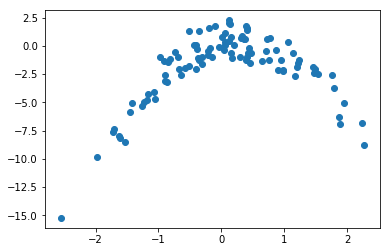

In [11]:
plt.scatter(x,y)
plt.show()

Correlation seems to be parabolic (quadratic)

In [123]:
fit_df = pd.DataFrame(np.array([np.ones(len(x)), x, x**2, x**3, x**4, y]).T,
                     columns=['b0', 'linear', 'quadratic', 'cubic', 'quartic', 'y'])

In [127]:
X = fit_df.iloc[:, :5]
y = fit_df['y']
lr = LinearRegression()

for col in range(4):
    error = 0 
    for row in range(len(x)):
        leave_out = ~X.index.isin([row])
        lr.fit(X.iloc[leave_out, :col+2], y[leave_out])
        error += (lr.predict(X.iloc[row, :col+2].values.reshape(1,-1)) - y[row]) **2
    print(f"LOOCV {fit_df.columns[col+1]} Error: {error[0]/100}")

LOOCV linear Error: 11.610208269693622
LOOCV quadratic Error: 1.2652839413336208
LOOCV cubic Error: 1.2820418215169613
LOOCV quartic Error: 1.3165915804276818


In [145]:
np.random.seed(2)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

fit_df = pd.DataFrame(np.array([np.ones(len(x)), x, x**2, x**3, x**4, y]).T,
                     columns=['b0', 'linear', 'quadratic', 'cubic', 'quartic', 'y'])

X = fit_df.iloc[:, :5]
y = fit_df['y']
lr = LinearRegression()

for col in range(4):
    error = 0 
    column = fit_df.columns[col+1]
    for row in range(len(x)):
        leave_out = ~X.index.isin([row])
        lr.fit(X.iloc[leave_out, :col+2], y[leave_out])
        error += (lr.predict(X.iloc[row, :col+2].values.reshape(1,-1)) - y[row]) **2
    print(f"LOOCV {column} Error: {error[0]/100}")
    print(f"LOOCV {column} coefficient(s): {LinearRegression().fit(fit_df.iloc[:,:col+2], fit_df['y']).coef_[-1]}")

LOOCV linear Error: 11.610208269693622
LOOCV linear coefficient(s): 1.8693293534124558
LOOCV quadratic Error: 1.2652839413336208
LOOCV quadratic coefficient(s): -2.123853491596635
LOOCV cubic Error: 1.2820418215169613
LOOCV cubic coefficient(s): -0.01646547927193165
LOOCV quartic Error: 1.3165915804276818
LOOCV quartic coefficient(s): -0.004309664505434567


The error rates are pretty similar. Quadratic has the lowest error (by a little bit), which was expected from the scatterplot.

In [173]:
LR = LogisticRegression()

mms = MinMaxScaler()
scaled_df = pd.DataFrame(mms.fit_transform(fit_df),
                     columns=['b0', 'linear', 'quadratic', 'cubic', 'quartic', 'y'])
for col in range(4):
    column = scaled_df.columns[col+1]
    formula = 'y ~ ' + ' + '.join(scaled_df.columns[1:col+2])
    results = smf.logit(formula, data=scaled_df).fit()
    print('\n')
    print(f"LOOCV {column} coefficient(s): {results.params[-1]}\n")

Optimization terminated successfully.
         Current function value: 0.512563
         Iterations 5


LOOCV linear coefficient(s): 2.1868819244326114

Optimization terminated successfully.
         Current function value: 0.437388
         Iterations 5


LOOCV quadratic coefficient(s): -3.5362802225441534

Optimization terminated successfully.
         Current function value: 0.437487
         Iterations 6


LOOCV cubic coefficient(s): 0.5233705062983773

Optimization terminated successfully.
         Current function value: 0.437559
         Iterations 6


LOOCV quartic coefficient(s): -0.7977187985821226



The coefficients are similar, but not exactly the same.

### Exercise 7 - Boston Housing Data

**Task** - We will now consider the `Boston` housing data set that we have used previously.

1. Based on this data set, provide an estimate for the population mean of `medv`. Call this estimate $\hat{\mu}$.
2. Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.
3. Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (2)?
4. Based on your bootstrap estimate from (3), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained from a t.test on `medv`.
5. Based on this data set, provide an estimate, $\hat{\mu}$ med, for the median value of `medv` in the population.
6. We now would like to estimate the standard error of $\hat{\mu}$ med. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.
7. Based on this data set, provide an estimate for the tenth percentile of `medv` in Boston suburbs. Call this quantity $\hat{\mu}$ 0.1.
8. Use the bootstrap to estimate the standard error of $\hat{\mu}$ 0.1. Comment on your findings.